In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommender-dataset-with-soil-nutrients/dataset.csv


## Import Libraries

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as mt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Reading the Dataset

In [3]:
df = pd.read_csv("../input/crop-recommender-dataset-with-soil-nutrients/dataset.csv")

In [4]:
df.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [5]:
df.tail()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
615,41,23,135,5.0,1.67,0.10655,26.0,39.2,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.0,40.2,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.0,40.0,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.0,41.0,92.58,45.73,21.48,potato
619,129,34,160,4.8,1.08,0.08869,25.0,39.0,259.93,33.49,14.16,potato


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.2+ KB


## No of Categories VS No of Samples

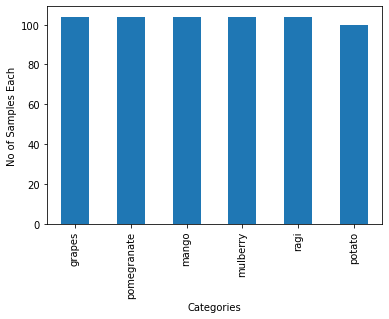

In [7]:
labels = df["label"].unique()
df["label"].value_counts().plot(kind="bar")
plt.xlabel('Categories')
plt.ylabel('No of Samples Each')
plt.show()

## Range of Values Vs Count for Each Parameter

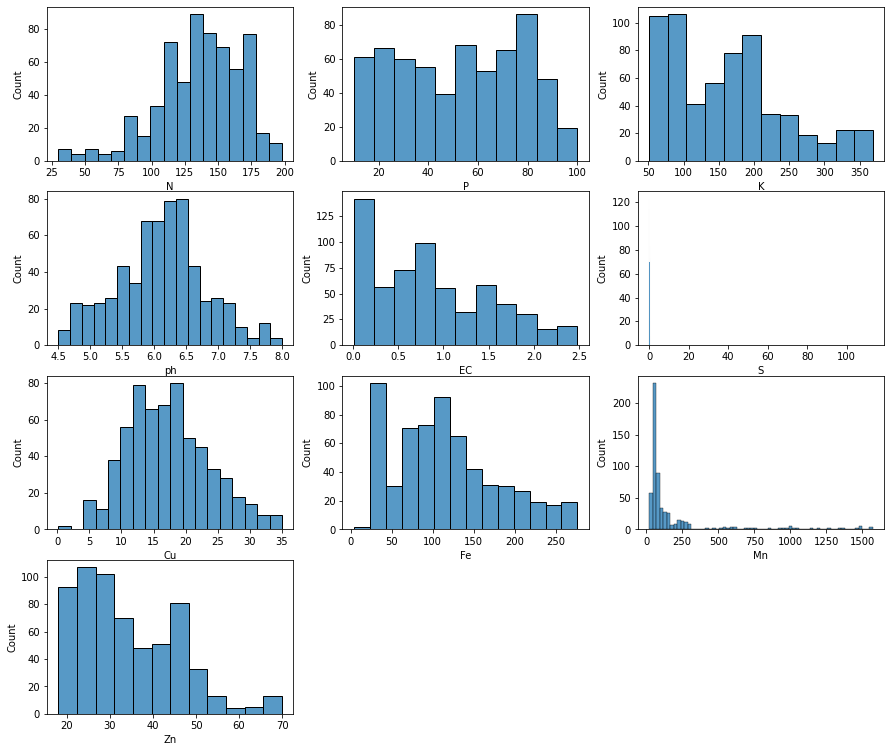

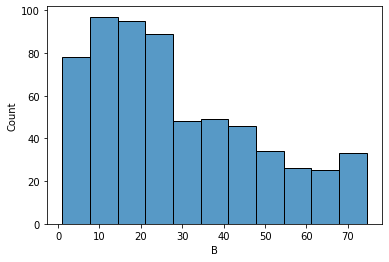

In [8]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(4,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[all_columns[-1]])
plt.show()

## Parameter Values vs Crop Type

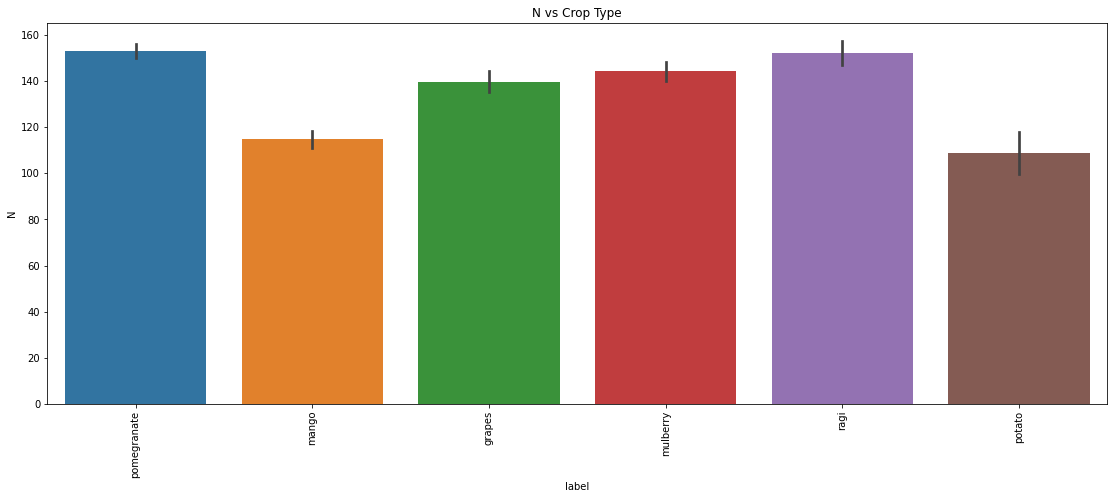

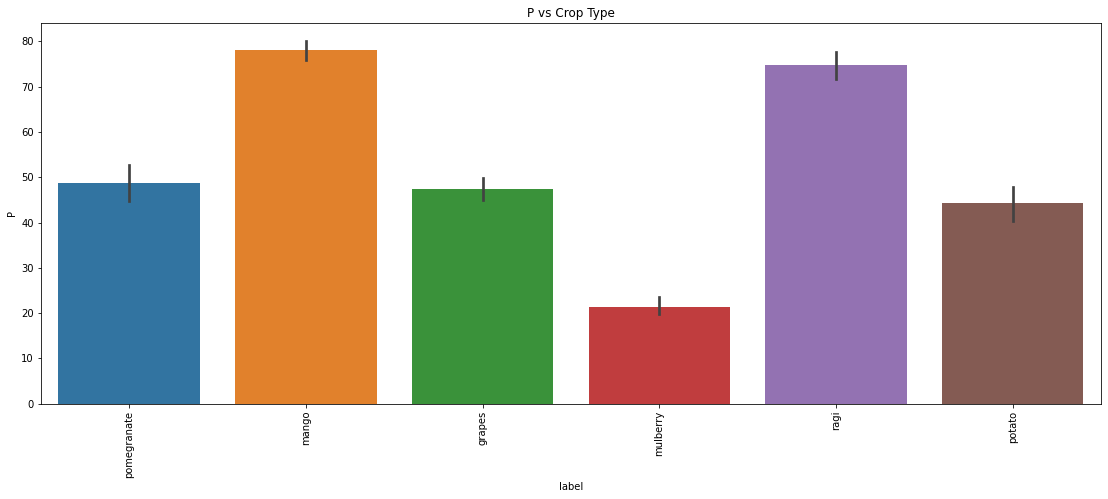

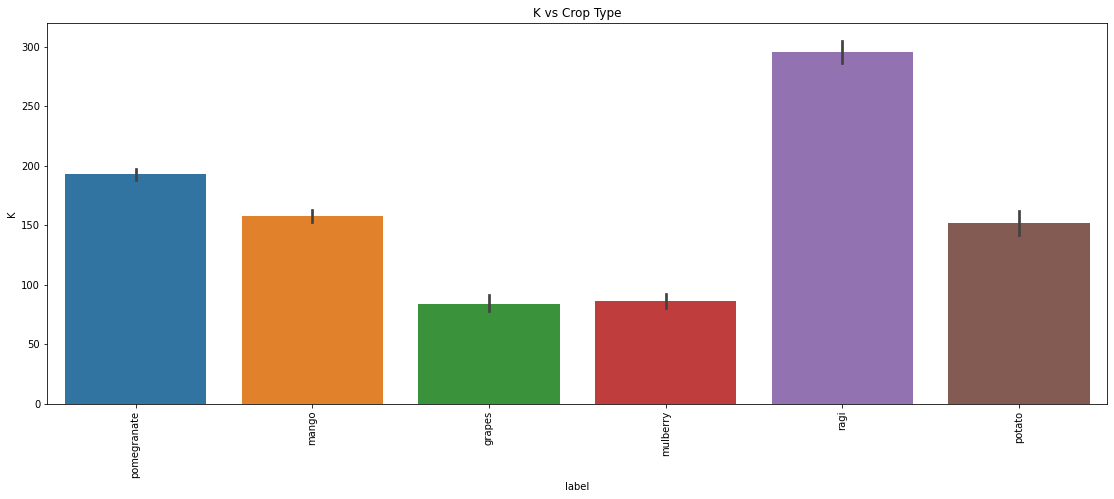

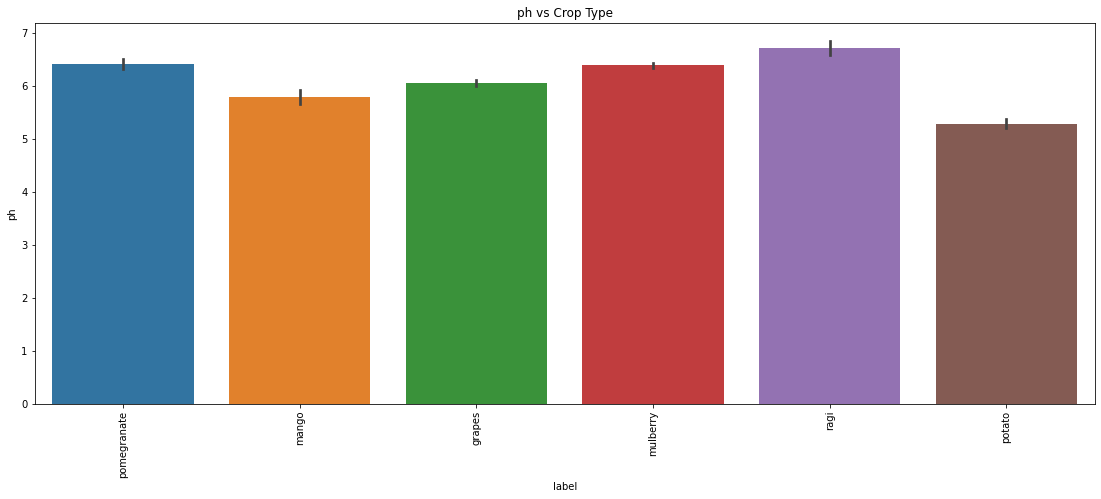

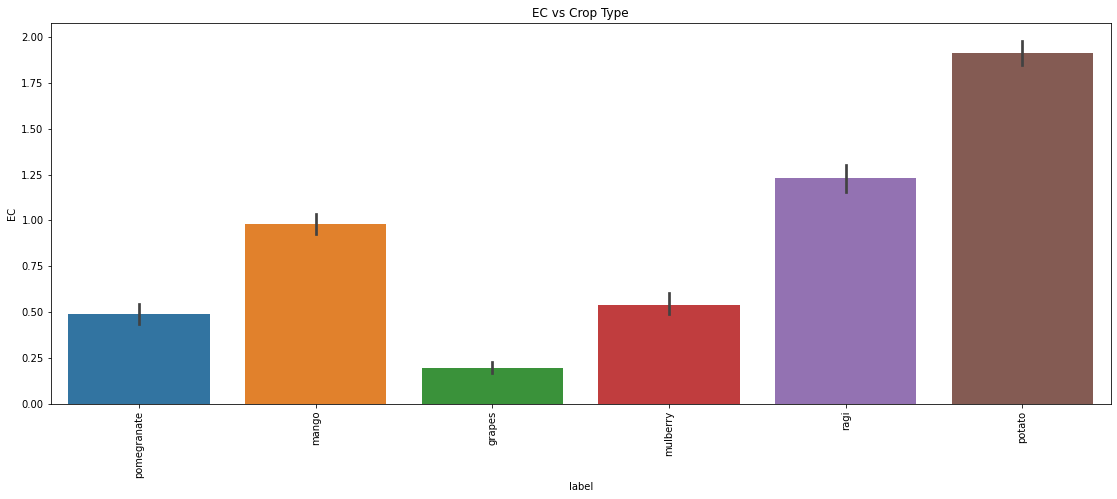

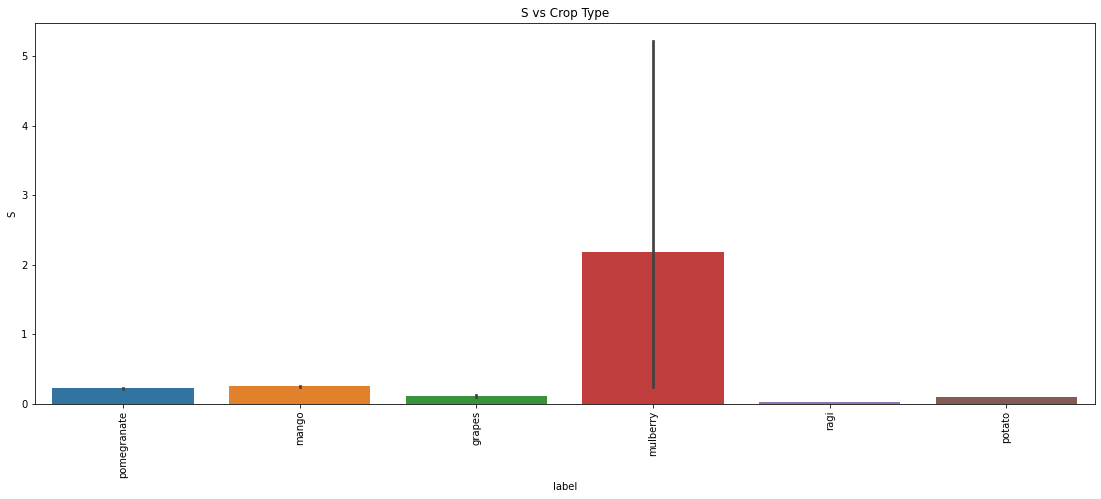

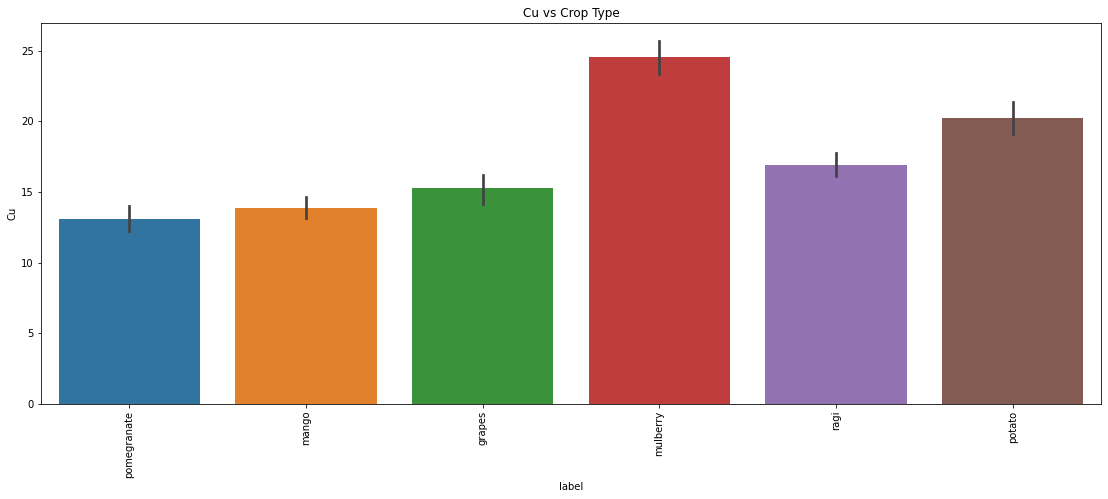

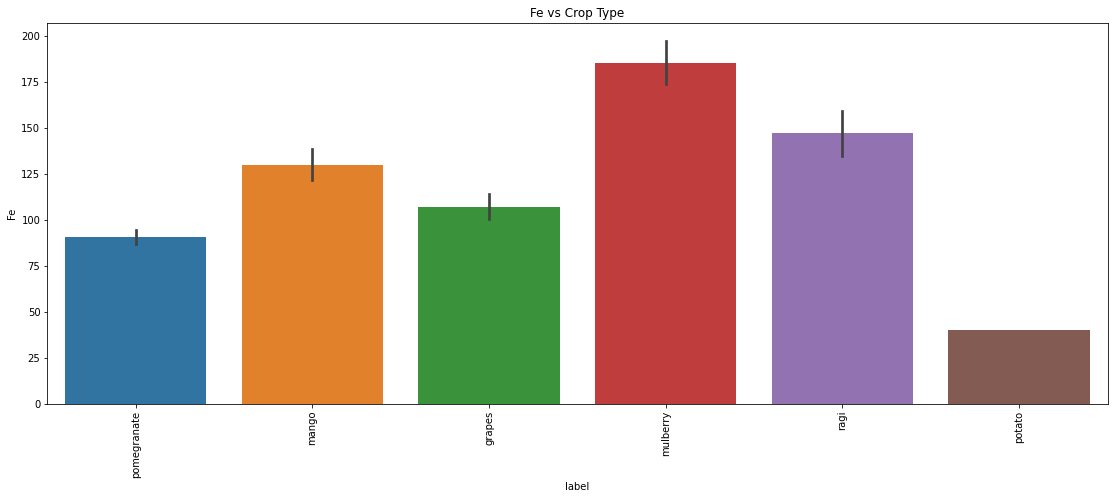

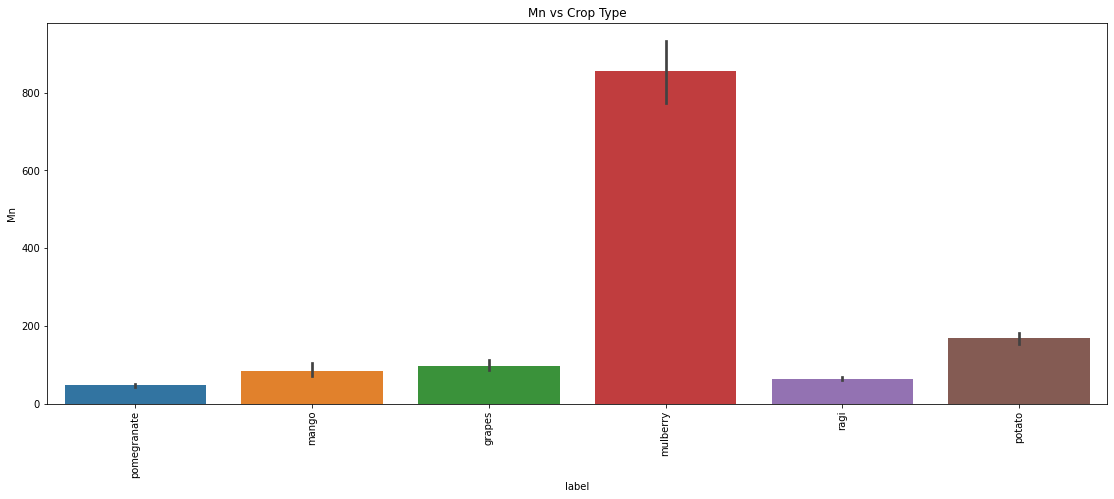

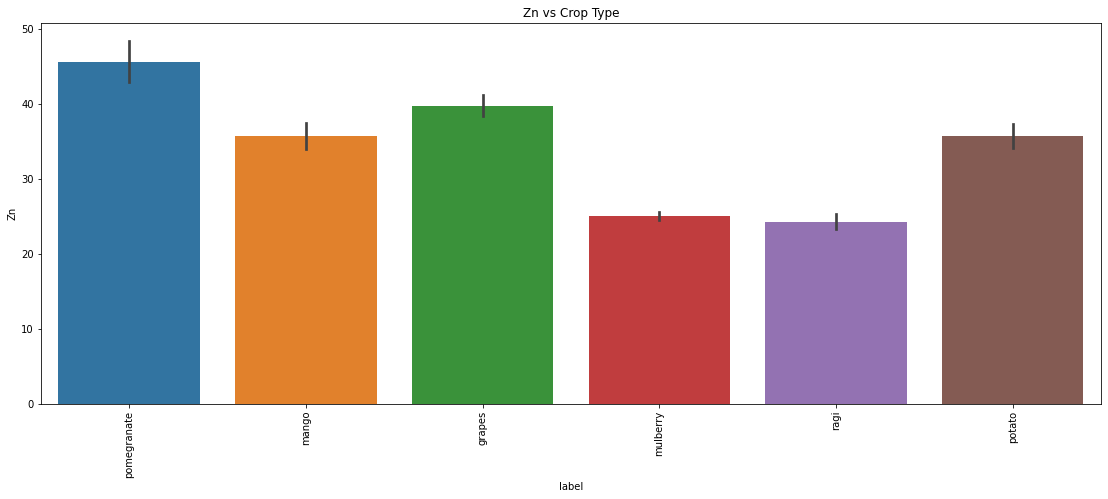

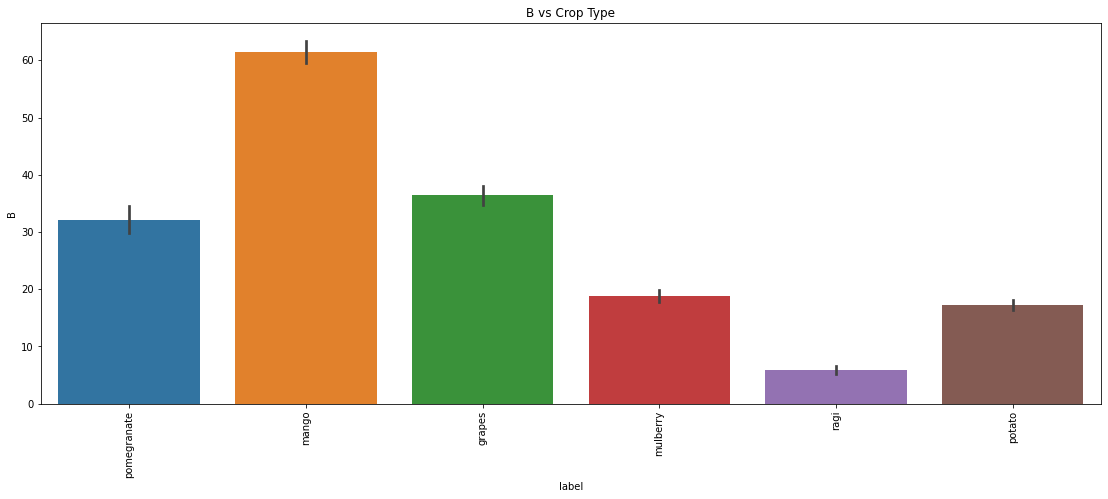

In [9]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

## Pairplot Showing Distribution Graph of Parameter Values for Crop Types

<Figure size 7200x5760 with 0 Axes>

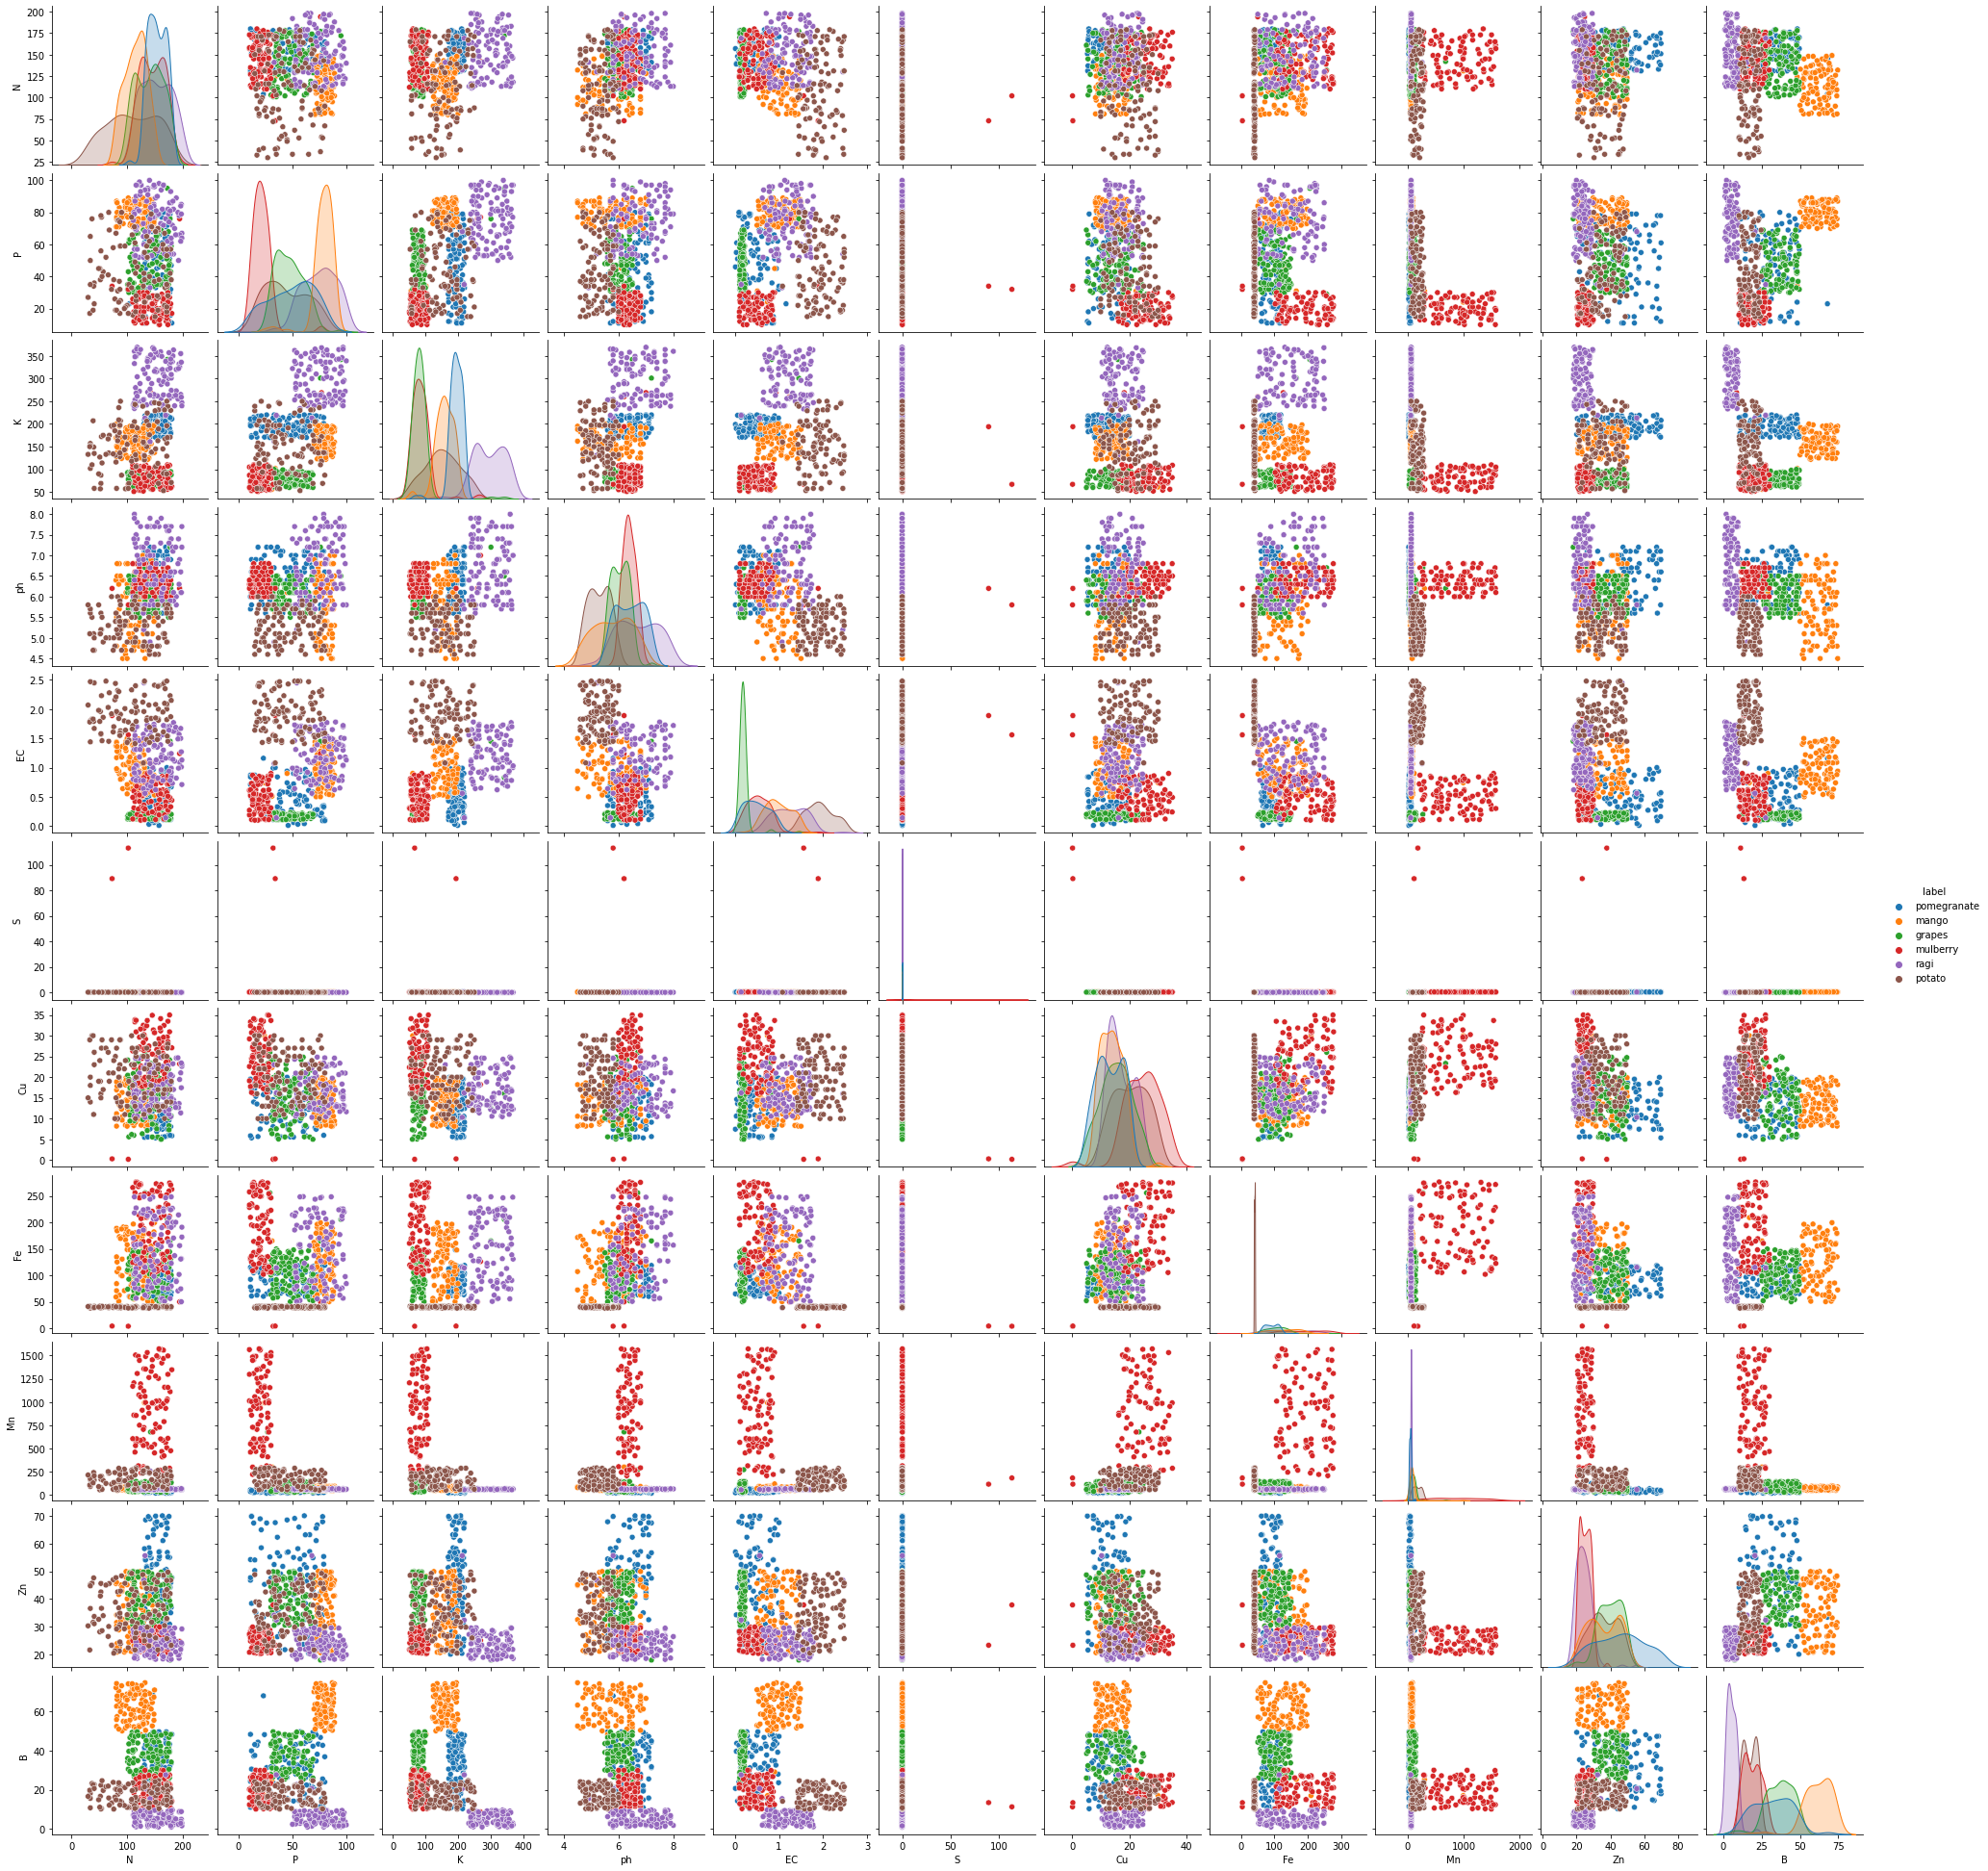

In [10]:
plt.figure(figsize=(100,80))
sns.pairplot(df, hue = "label")
plt.show()

## Correlation Matrix Using Heat Map

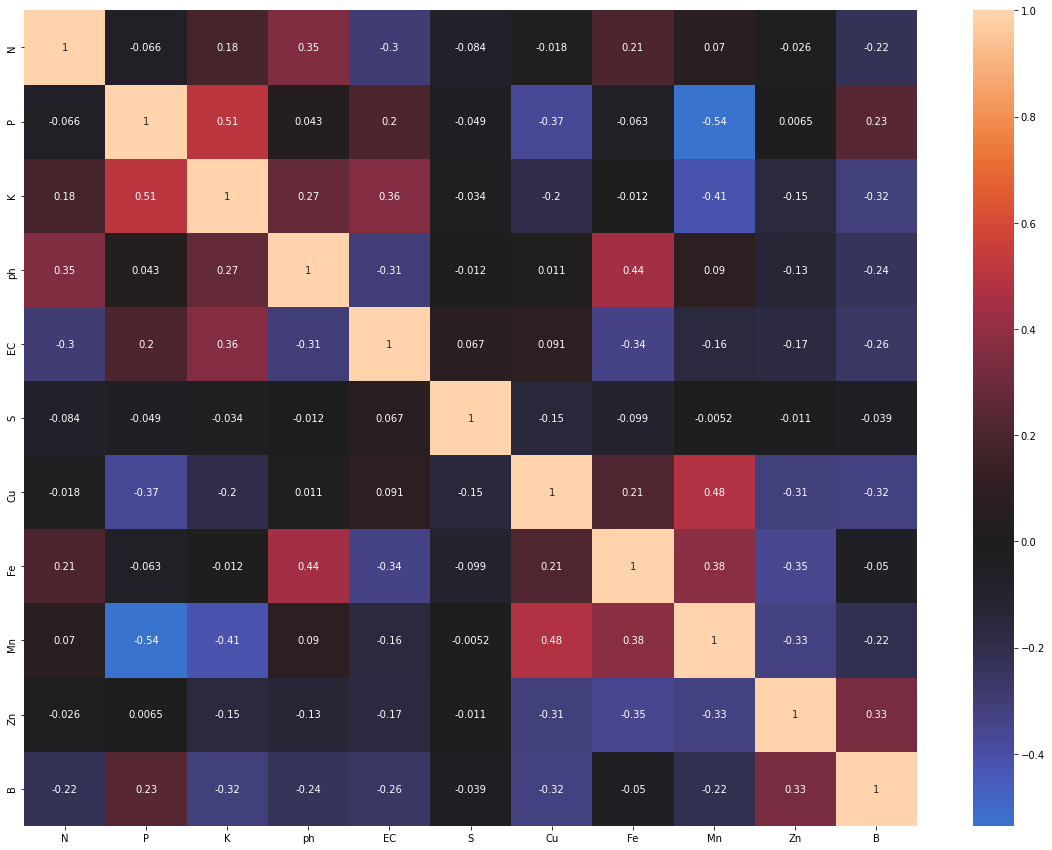

In [11]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

## Label Encoding

In [12]:
label_encoder = LabelEncoder()
X = df[all_columns]
y = label_encoder.fit_transform(df["label"])
print(X.shape, y.shape)

(620, 11) (620,)


In [13]:
label_dict = {}
for i in range(6):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'grapes',
 1: 'mango',
 2: 'mulberry',
 3: 'pomegranate',
 4: 'potato',
 5: 'ragi'}

## Splitting the Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (496, 11), (496,)
Train Data: (124, 11), (124,)


## Importing the Essential Models for Training

In [16]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from sklearn.pipeline import make_pipeline

In [17]:
acc = []
acc_test = []
model = []
f1scores = []

## Logistic Regression

Accuracy on Test Data: 94.35483870967742%


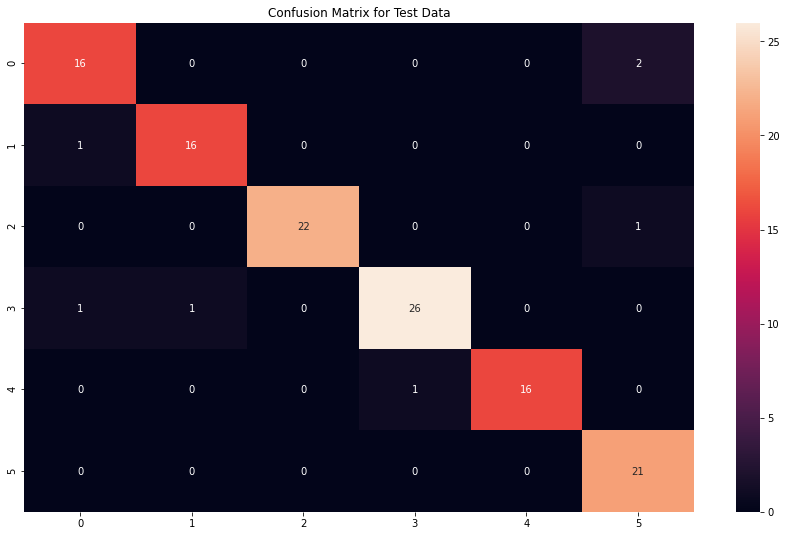


Accuracy on Whole Data: 96.7741935483871%


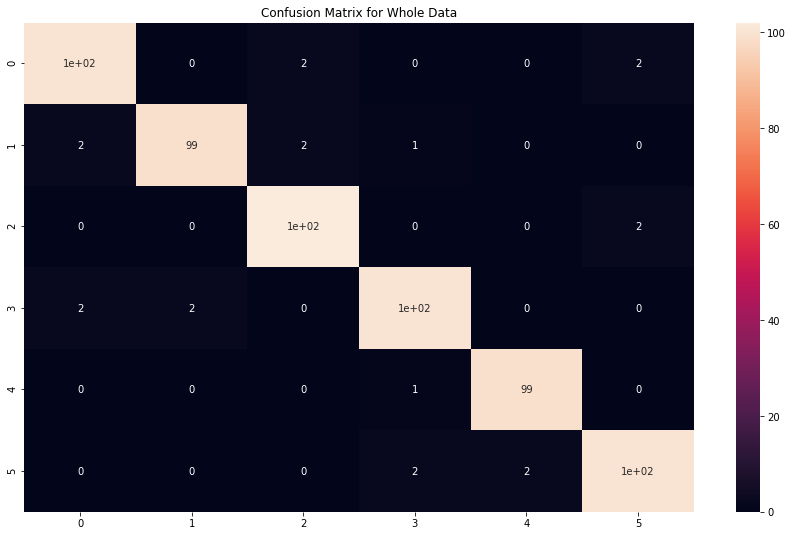

In [18]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=2))
lr_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = lr_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Logistic Regression')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## K Neighbors Classifier

Accuracy at k = 1 is 0.9274193548387096
Accuracy at k = 2 is 0.9274193548387096
Accuracy at k = 3 is 0.9435483870967742
Accuracy at k = 4 is 0.9435483870967742
Accuracy at k = 5 is 0.9435483870967742
Accuracy at k = 6 is 0.9435483870967742
Accuracy at k = 7 is 0.9435483870967742
Accuracy at k = 8 is 0.9435483870967742
Accuracy at k = 9 is 0.9435483870967742
Accuracy at k = 10 is 0.9435483870967742
Accuracy at k = 11 is 0.9435483870967742
Accuracy at k = 12 is 0.9435483870967742
Accuracy at k = 13 is 0.9435483870967742
Accuracy at k = 14 is 0.9435483870967742
Accuracy at k = 15 is 0.9435483870967742
Accuracy at k = 16 is 0.9435483870967742
Accuracy at k = 17 is 0.9435483870967742
Accuracy at k = 18 is 0.9435483870967742
Accuracy at k = 19 is 0.9435483870967742
Accuracy at k = 20 is 0.9435483870967742
Accuracy at k = 21 is 0.9435483870967742
Accuracy at k = 22 is 0.9435483870967742
Accuracy at k = 23 is 0.9435483870967742
Accuracy at k = 24 is 0.9435483870967742
Accuracy at k = 25 is 0.9

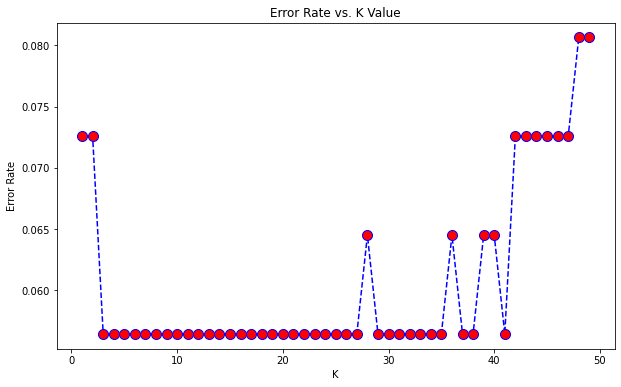

In [19]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 94.35483870967742%


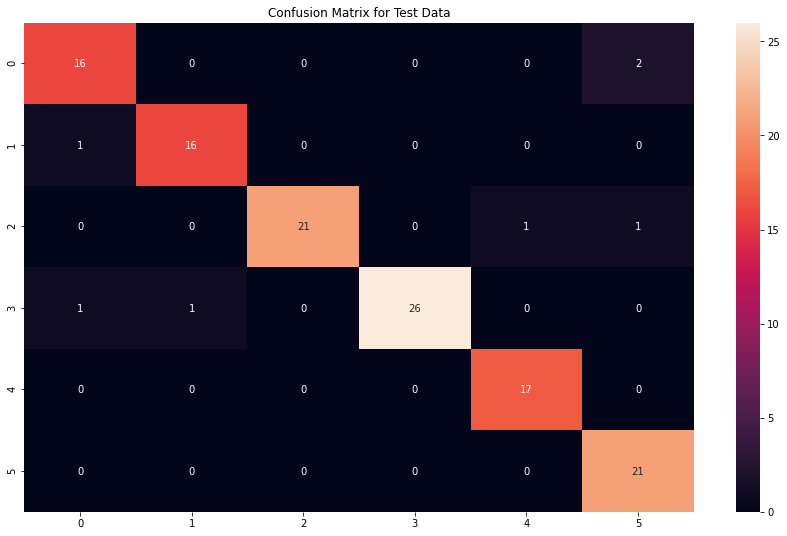


Accuracy on Whole Data: 96.61290322580646%


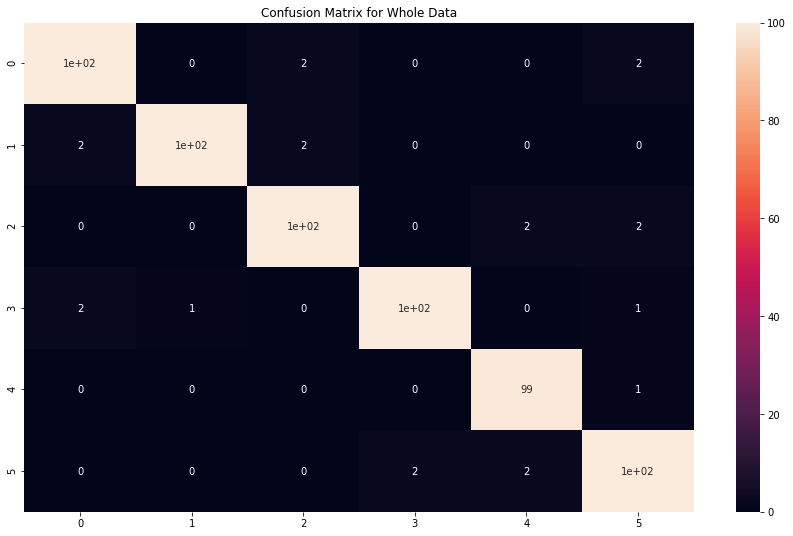

In [20]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 3))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('K Neighbor Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Random Forest Classifier

Accuracy on Test Data: 94.35483870967742%


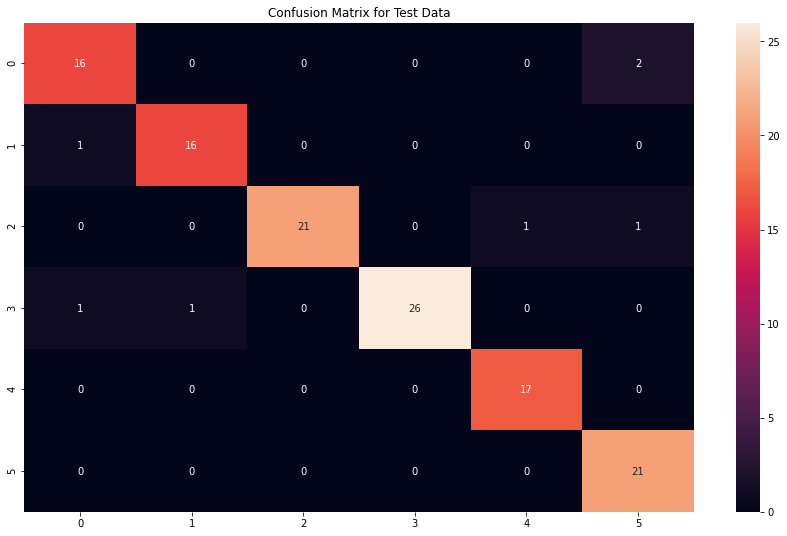


Accuracy on Whole Data: 98.87096774193549%


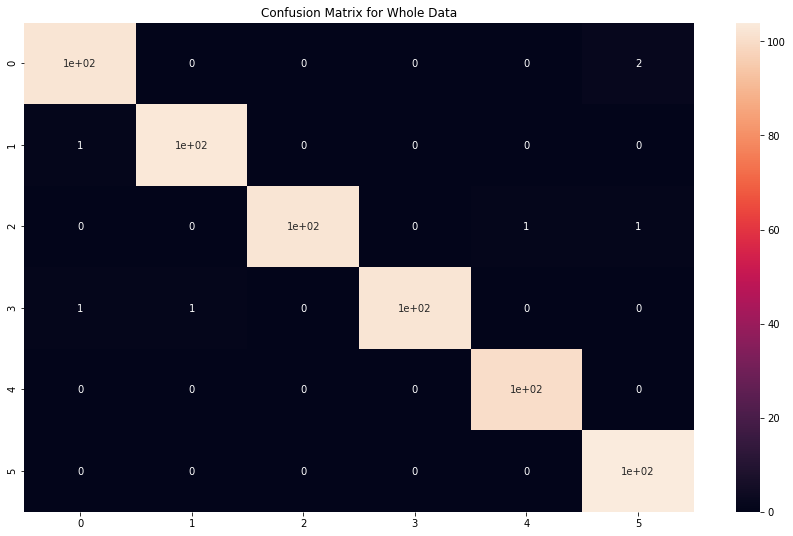

In [21]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Random Forest Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## XGBoost Classifier

In [22]:
import xgboost
from xgboost import XGBClassifier

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:02:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 94.35483870967742%


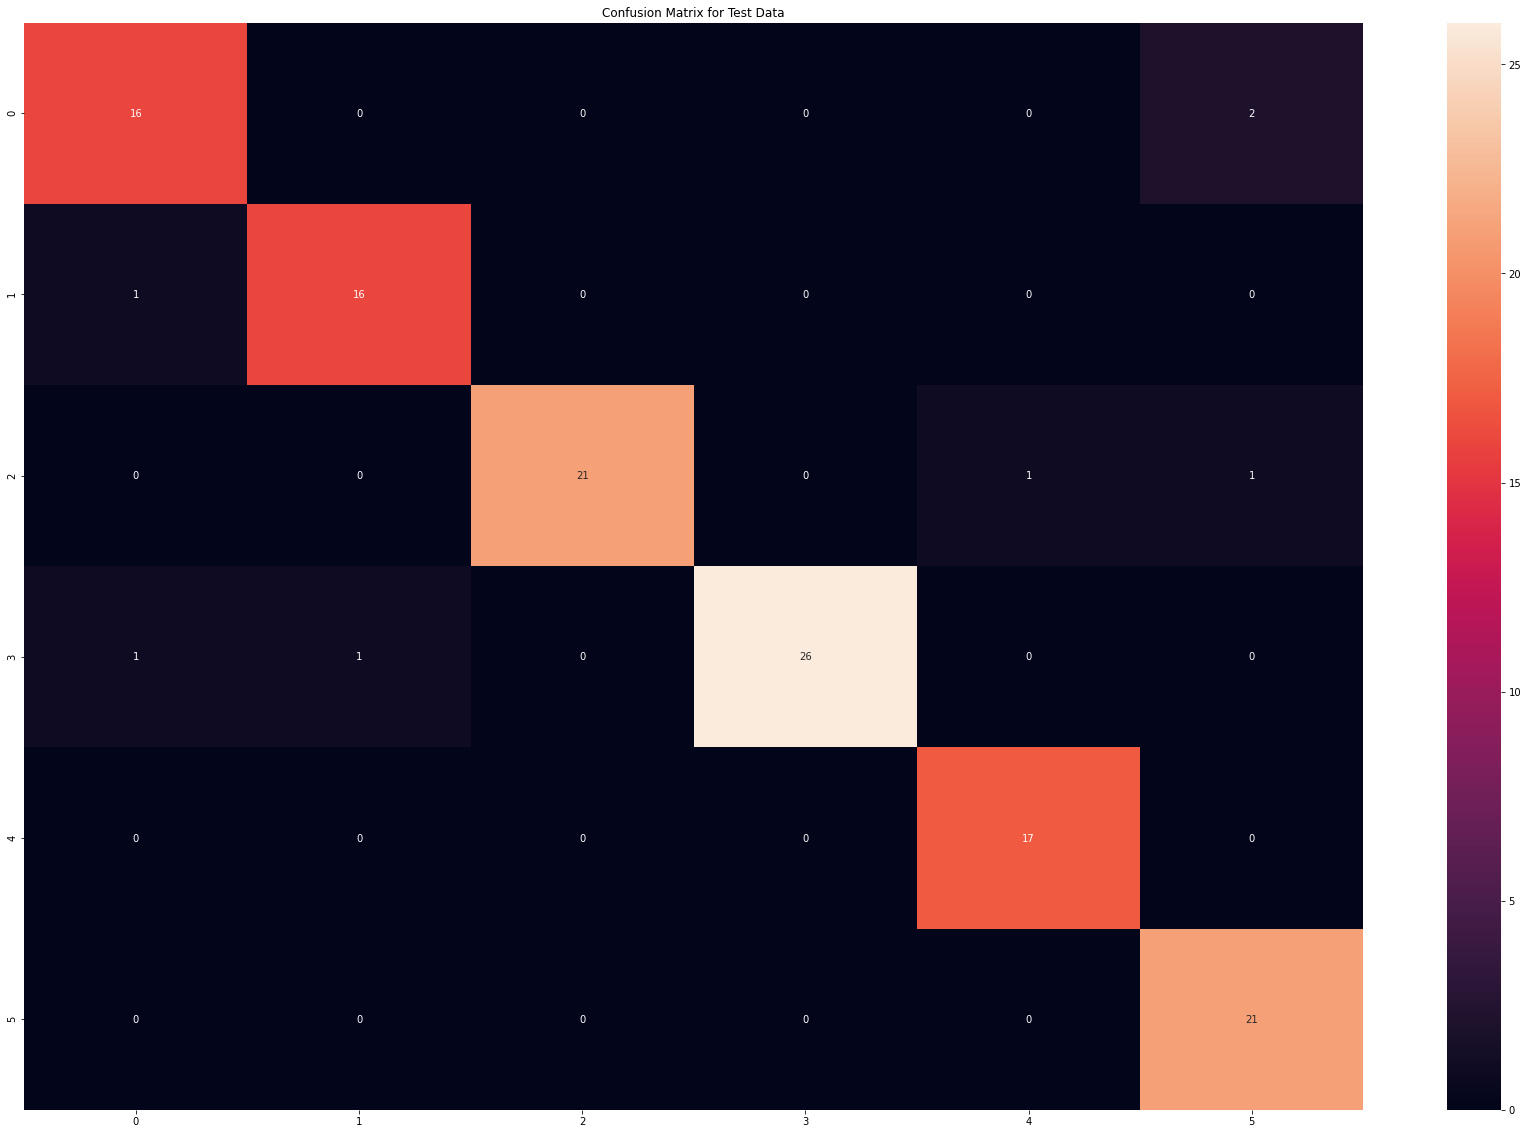


Accuracy on Whole Data: 98.87096774193549%


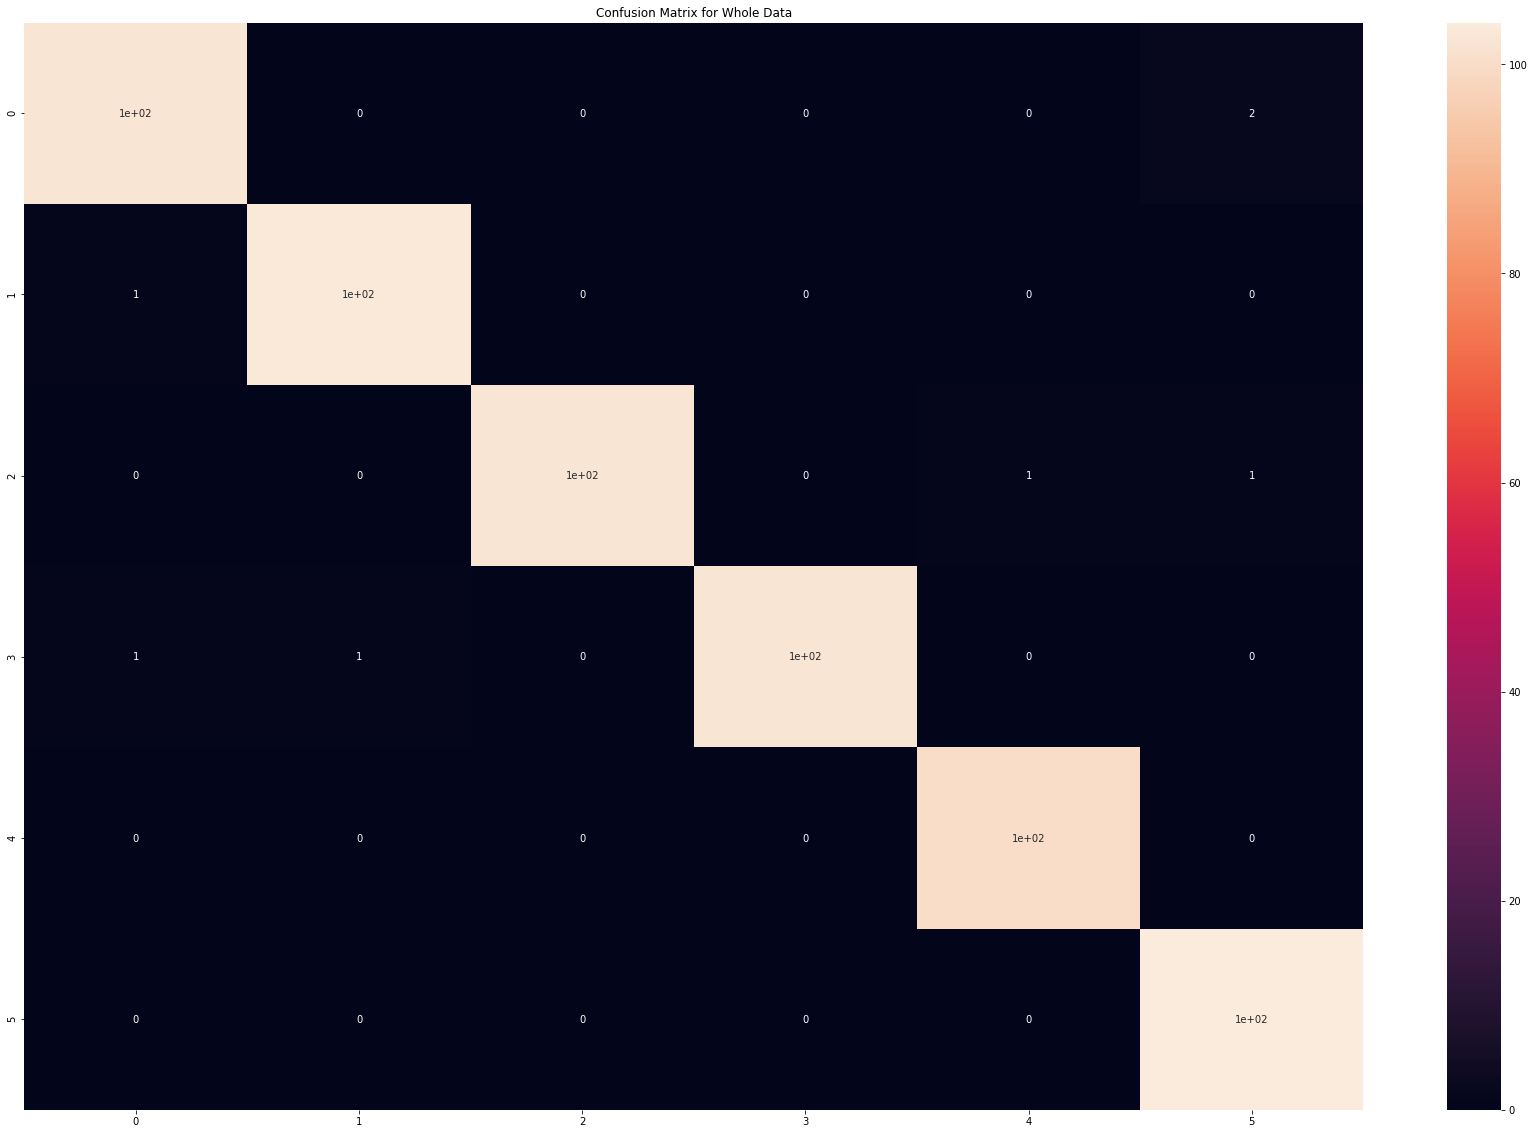

In [23]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (30,20))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('XGBoost Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (30,20))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Decision Tree Classifier

Accuracy on Test Data: 95.96774193548387%


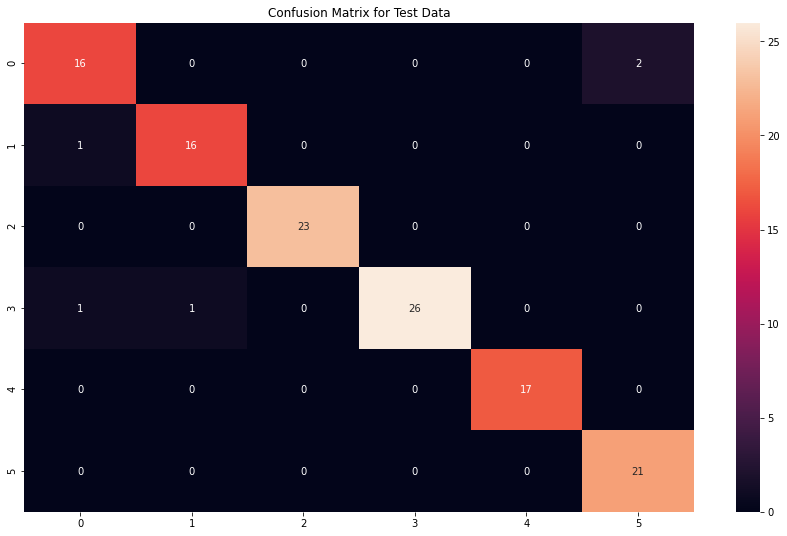


Accuracy on Whole Data: 98.38709677419355%


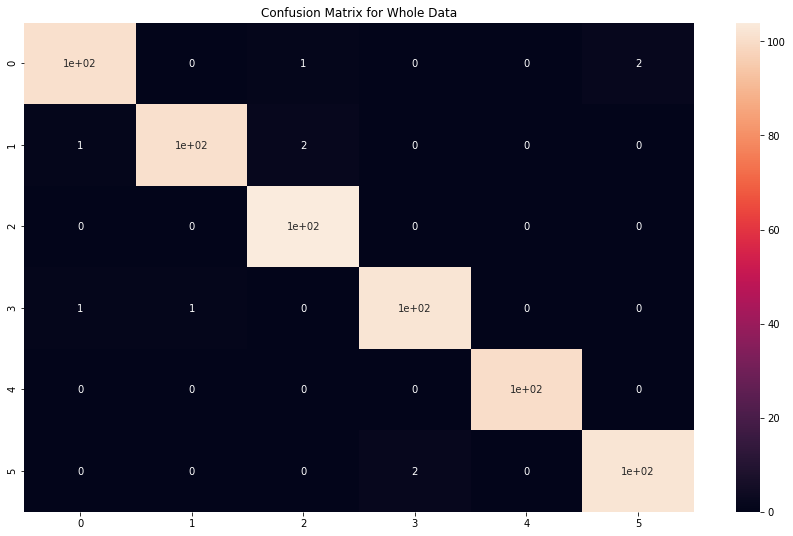

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5))
dt_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = dt_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = dt_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Decision Tree Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Gaussian Naive Bayes (GaussianNB)

Accuracy on Test Data: 95.16129032258065%


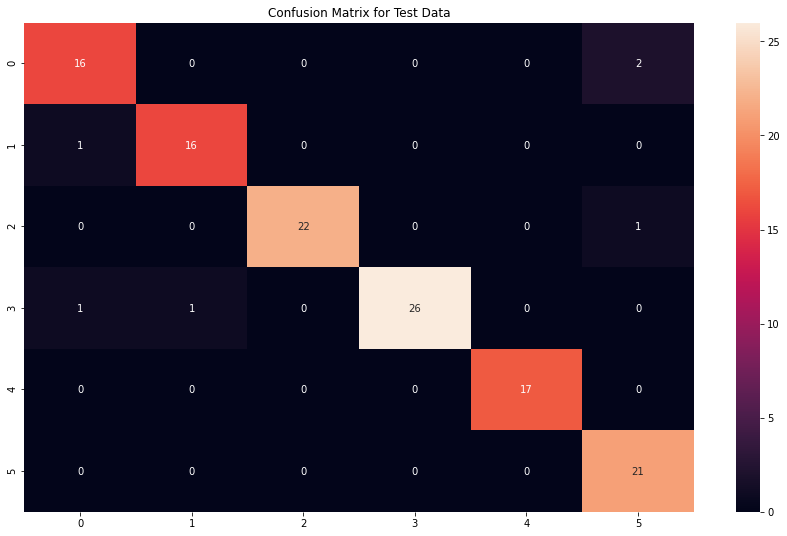


Accuracy on Whole Data: 96.93548387096774%


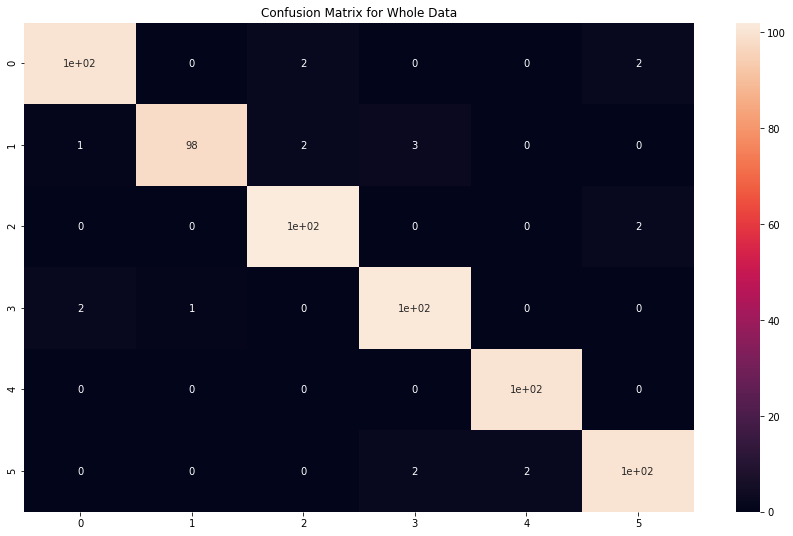

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
acc_test.append(accuracy*100)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = nb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
acc.append(accuracy*100)
model.append('Naive Bayes Classifier')
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Comparison on Accuracy of Entire Data for The Models Trained

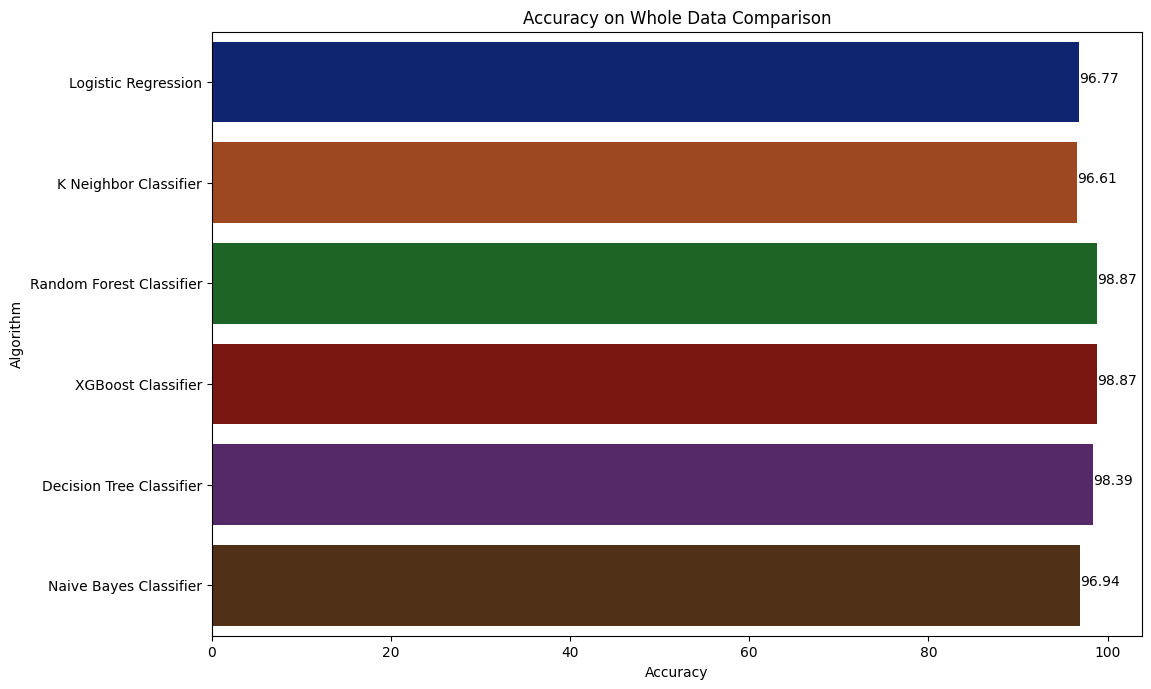

In [26]:
plt.figure(figsize=[12,8],dpi = 100)
plt.title('Accuracy on Whole Data Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
for index, value in enumerate(acc):
    plt.text(value, index, str(round(value,2)))

## Comparison on Accuracy of Test Data for The Models Trained

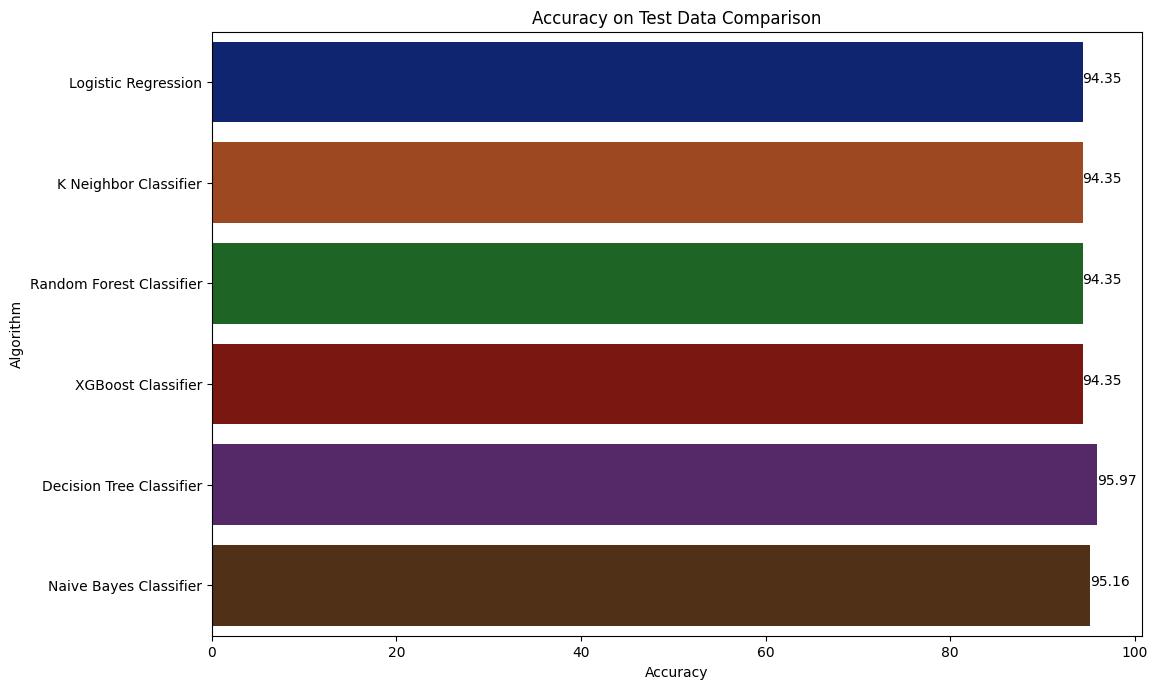

In [27]:
plt.figure(figsize=[12,8],dpi = 100)
plt.title('Accuracy on Test Data Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_test,y = model,palette='dark')
for index, value in enumerate(acc_test):
    plt.text(value, index, str(round(value,2)))

## Saving Models

In [28]:
pickle.dump(lr_pipeline, open("nb_pipeline.pkl", "wb"))
pickle.dump(knn_pipeline, open("knn_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open("rf_pipeline.pkl", "wb"))
pickle.dump(xgb_pipeline, open("xgb_pipeline.pkl", "wb"))
pickle.dump(dt_pipeline, open("dt_pipeline.pkl", "wb"))
pickle.dump(nb_pipeline, open("nb_pipeline.pkl", "wb"))

pickle.dump(label_dict, open("label_dictionary.pkl", "wb"))
print("Saved All Models")

Saved All Models
